**Physics 3700 Worksheet 9**

***1.Images in Python.*** *Python has a couple of sample images to run simple tests on. In the following example ascent is a 2D list holding gray-scale levels with 0 representing black and 255 representing white. If you wanted to access an element in the list you can use ascent[ i ][ j ] and if you wanted to flatten the 2D list into a 1D list you can use ascent.ravel().*

      import scipy.misc
      import matplotlib.pyplot as plt
      ascent = scipy.misc.ascent()
      plt.gray()
      plt.imshow(ascent)
      plt.show()
  
*(a) Plot a histogram of the gray-scale levels in ascent.*

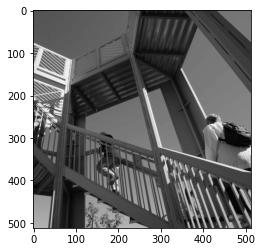

In [1]:
import scipy.misc
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import time
ascent = scipy.misc.ascent()
plt.gray()
plt.imshow(ascent)
plt.show()

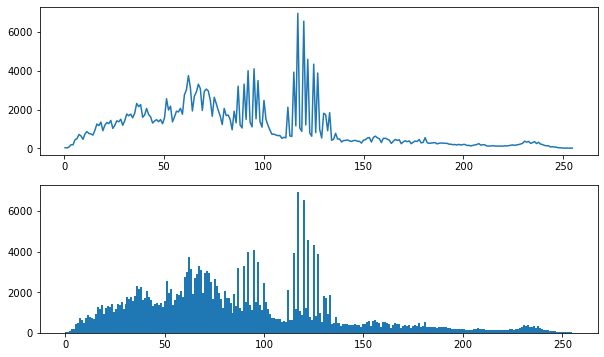

In [4]:
ascent_1D = ascent.ravel()
y, binEdges = np.histogram(ascent_1D, bins=256)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(bincenters, y)
plt.subplot(212)
plt.hist(ascent_1D, bins=256)
plt.show()


In [21]:
ascent.shape

(512, 512)

*(b) The following picture was shown in class as examples of brightness and contrast adjustments you could make to an image. Apply each of them to this sample picture. To initialize a new 2D list:*

       w,h=512,512 #w for width and h for height
       new2d=[[0 for x in range(w)] for y in range(h)]
       
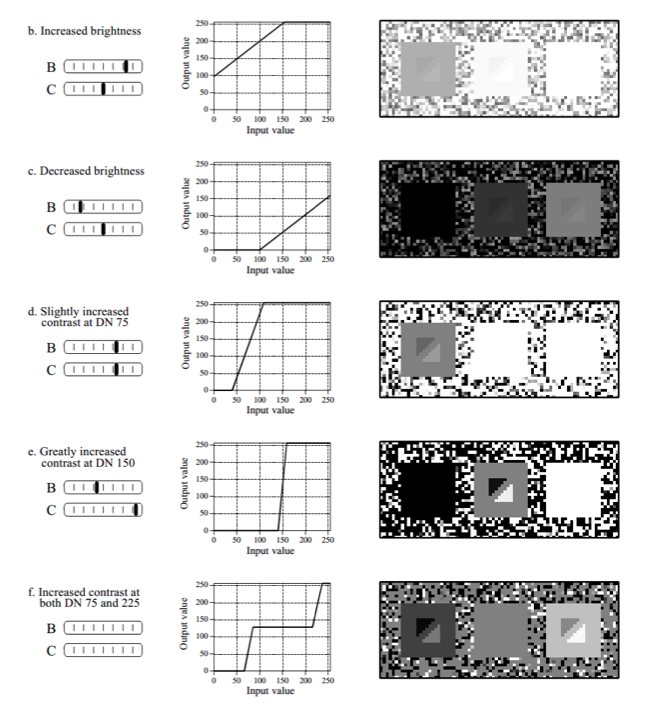

In [5]:
# Function to adjust the brightness using changing the 2D structure to 1D, adjusting 
#   brightness and then reassembling back into a 2D structure
def bright_adjust(pic_2D,bright_percent):    # bright percent 0 to 199%
    pic_1D_new_bright = []
    pic_1D = pic_2D.ravel()
    for n in pic_1D:
        newn = int(n+(bright_percent-100)/100*255)
        if newn > 255:
            newn = 255
        elif newn < 0:
            newn = 0        
        pic_1D_new_bright.append(newn)  
    pic_2D_new_bright = np.array(pic_1D_new_bright).reshape(512,512) 
    return pic_2D_new_bright

<Figure size 432x288 with 0 Axes>

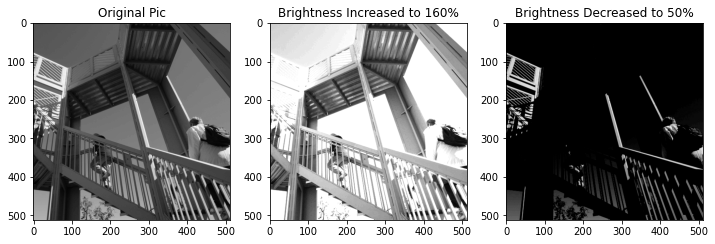

In [42]:
# The pic ascend with brightness increased and brightness decreased using the 2D to 1D
#   conversion brightness function
plt.gray()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,12))
ax1.set_title('Original Pic')
ax1.imshow(ascent)
ax2.set_title('Brightness Increased to 160%')
ax2.imshow(bright_adjust(ascent,160))
ax3.set_title('Brightness Decreased to 50%')
ax3.imshow(bright_adjust(ascent,50))
plt.show()

In [7]:
# Fucntion to adjust the brightness using the maintaining the 2D structure
def bright_adjust1(pic_2D,bright_percent):
    w,h=512,512 #w for width and h for height
    pic_2D_new_bright = np.zeros((w,h))
    i=0
    while i < w:
        j=0
        while j < h:          
            new_pixel = int(pic_2D[i,j]+(bright_percent-100)/100*255)
            if new_pixel > 255:
                new_pixel = 255
            elif new_pixel < 0:
                new_pixel = 0 
            pic_2D_new_bright[i][j] = new_pixel
            j+=1
        i+=1
    return pic_2D_new_bright

<Figure size 432x288 with 0 Axes>

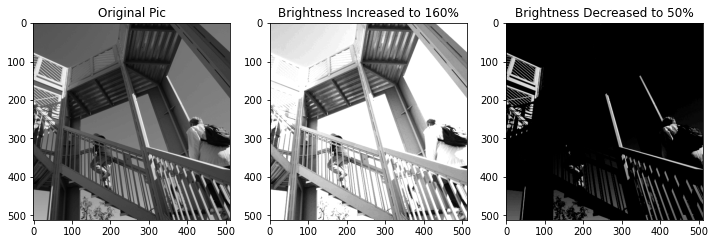

In [43]:
# The pic ascend with brightness increased and brightness decreased using the brightness
#   funciton that maintains the 2D structure
plt.gray()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,12))
ax1.set_title('Original Pic')
ax1.imshow(ascent)
ax2.set_title('Brightness Increased to 160%')
ax2.imshow(bright_adjust1(ascent,160))
ax3.set_title('Brightness Decreased to 50%')
ax3.imshow(bright_adjust1(ascent,50))
plt.show()

In [15]:
# Curious to see which brightness process processes faster. It turns out the 2D to 1D
#   conversion brightness function was faster
time_start = time.process_time()
n1 = bright_adjust(ascent,100)
time_elapsed1 = (time.process_time() - time_start)
print("Run 1D processing: %5.5f s" % time_elapsed1)
n2 = bright_adjust1(ascent,100)
time_elapsed2 = (time.process_time() - time_start)
print("Run 2D processing: %5.5f s" % (time_elapsed2-time_elapsed1))

Run 1D processing: 0.97659 s
Run 2D processing: 1.02856 s


In [11]:
def constrast_adjust(pic_2D,grey_num,contrast_percent):    #grey_num is centre of the contrast
    pic_1D_new_contr = []
    pic_1D = pic_2D.ravel()
    for n in pic_1D:
        new_pixel = grey_num+int((n-grey_num)*1.1**(contrast_percent-100))
        if new_pixel > 255:
            new_pixel = 255
        elif new_pixel < 0:
            new_pixel = 0        
        pic_1D_new_contr.append(new_pixel)  
    pic_2D_new_contr = np.array(pic_1D_new_contr).reshape(512,512) 
    return pic_2D_new_contr

<Figure size 432x288 with 0 Axes>

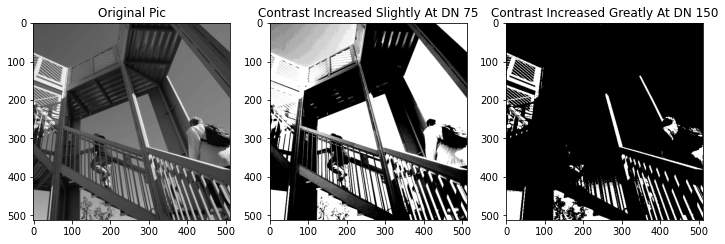

In [41]:
plt.gray()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,12))
ax1.set_title('Original Pic')
ax1.imshow(ascent)
ax2.set_title('Contrast Increased Slightly At DN 75')
ax2.imshow(constrast_adjust(ascent, 75, 120))
ax3.set_title('Contrast Increased Greatly At DN 150')
ax3.imshow(constrast_adjust(ascent, 150, 180))
plt.show()

In [27]:
# Function adjusts contrast of a pic for two CNs
def constrast_adjust_2(pic_2D,grey_num1,grey_num2,contrast_percent):    
    pic_1D_new_contr = []
    pic_1D = pic_2D.ravel()
    for n in pic_1D:
        if n <128:
            new_pixel = grey_num1+int((n-grey_num1)*1.1**(contrast_percent-100))
            if new_pixel > 127:
                new_pixel = 127
            elif new_pixel < 0:
                new_pixel = 0        
            pic_1D_new_contr.append(new_pixel)  
        elif n >=128:
            new_pixel = grey_num2+int((n-grey_num2)*1.1**(contrast_percent-100))
            if new_pixel > 255:
                new_pixel = 255
            elif new_pixel < 128:
                new_pixel = 128       
            pic_1D_new_contr.append(new_pixel) 
    pic_2D_new_contr = np.array(pic_1D_new_contr).reshape(512,512) 
    return pic_2D_new_contr

<Figure size 432x288 with 0 Axes>

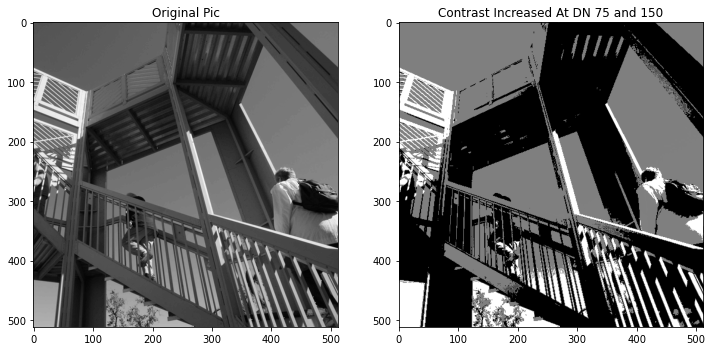

In [45]:
plt.gray()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
ax1.set_title('Original Pic')
ax1.imshow(ascent)
ax2.set_title('Contrast Increased At DN 75 and 150')
ax2.imshow(constrast_adjust_2(ascent, 75, 150, 150))
plt.show()

***2.Image Histograms.*** *This isn’t really a Jupyter question, but please type out your solution and answers in a cell in your notebook. Plotting a histogram of the gray levels in an image provides useful information. A very basic example would be identifying the size and/or number of objects in an image. When the area covered by a photograph is known, the area of an object in the photo can sometimes be found by determining how the number of pixels in the object compares to the total number of pixels in the image.*

$$ \frac{Area of object}{Area of whole picture} = \frac{Number of pixels in object}{Total pixels} $$

*(a) A photograph of a light-coloured ball lying on the grass is digitized using 4 bits. The total area of the scene shown in the photo is 600 cm2. The number of pixels for each gray level is given in the table below. Is the ball a golf ball, a softball or a volleyball?*

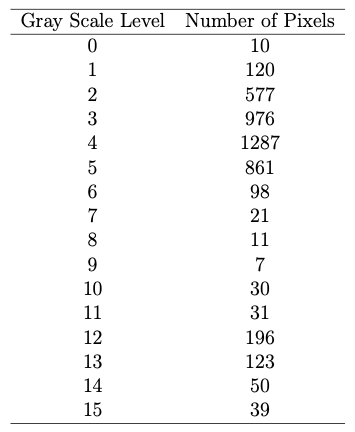

In [46]:
picture_area = 600
total_pixels = 10+120+577+976+1287+861+98+21+11+7+30+31+196+123+50+39
volleyball_area = np.pi*10**2  # 10 cm radius
golfball_area = np.pi*2.1**2
numberofpixels_volley = volleyball_area/picture_area*total_pixels
numberofpixels_golf = golfball_area/picture_area*total_pixels
print ('The number of pixels for the volley ball: ',numberofpixels_volley)
print ('The number of pixels for the volley golf: ',numberofpixels_golf)

The number of pixels for the volley ball:  2323.207767329652
The number of pixels for the volley golf:  102.45346253923765


In [47]:
# Light coloured ball would mean that the ball would have high gray scale numbers. Since there is only
#   a few hundred light coloured pixels, I'll say that the picture is of a golf ball.

*(b) A handful of light-coloured marbles is thrown down on a black tablecloth. Each marble has a diameter of 13 mm. An 8-bit digital photograph is taken of a 10×15 cm area of the tablecloth and marbles. A histogram for the image, which contains only eight distinct colours, is described in the table below*

*(a) How many marbles appear in the photograph?*

*(b) If the marbles are solid in colour, how many different colours are there? How many marbles of each colour appear in the image?*

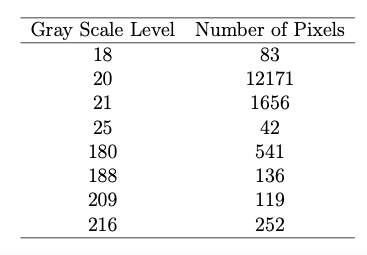

In [48]:
picture_area = 10*15
pixel_count = [83,12171,1656,42,541,136,119,252]
total_pixels = sum(pixel_count)
marble_area = np.pi*(1.3/2)**2 
numberofpixels_marble = marble_area/picture_area*total_pixels
numberofmarbles = int(total_pixels/numberofpixels_marble)
numberofmarbles_each = []
for n in pixel_count:
    numberofmarbles_each.append(int(round(n/numberofpixels_marble,0)))
print('There are',numberofmarbles,'marbles in the picture')
print('The cound of each coloured marble:',numberofmarbles_each)


There are 113 marbles in the picture
The cound of each coloured marble: [1, 92, 12, 0, 4, 1, 1, 2]


***3.Subtracting Images.*** *A couple applications of image subtraction are background removal and motion detection. Load the following two images into Python and subtract one image from the other. You can just do an element-for-element subtraction. The result will include negative numbers so you will need to scale all your values up.*

      import matplotlib.image as mpimg
      img1=mpimg.imread("clock1.png")
      img2=mpimg.imread("clock2.png")
      
      # this writes out the 2D list imgsub into a png file
      mpimg.imsave("clocksub.png",imgsub)

In [49]:
import matplotlib.image as mpimg
img1=mpimg.imread("./files/Lab8andWS9Images/clock1.png")
img2=mpimg.imread("./files/Lab8andWS9Images/clock2.png")

In [81]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
img1_grey = np.floor(rgb2gray(img1)*8+0.5)
img2_grey = np.floor(rgb2gray(img2)*8+0.5)

<Figure size 432x288 with 0 Axes>

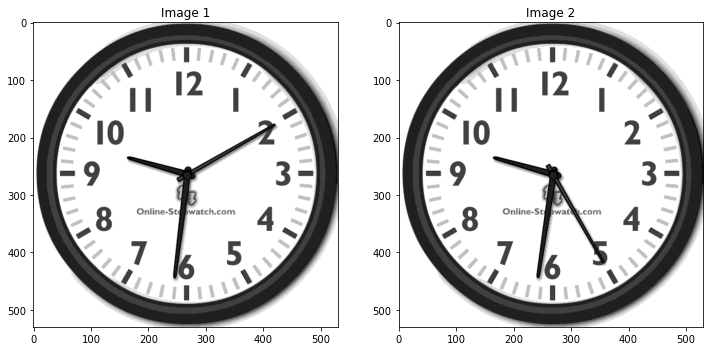

In [83]:
plt.gray()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
ax1.set_title('Image 1')
ax1.imshow(img1_grey)
ax2.set_title('Image 2')
ax2.imshow(img2_grey)
plt.show()

In [100]:
def image_subtraction(image1, image2):
    image1_1D = image1.ravel()
    image2_1D = image2.ravel()
    result_image = []
    result_image_1D = []
    for n1, n2 in zip(image1_1D, image2_1D):
        result_image.append(n1-n2)
    min_pixel = min(result_image)
    for n in result_image:
        result_image_1D.append(n+(-min_pixel))
    result_image_2D = np.array(result_image_1D).reshape(530,530) 
    return result_image_2D

<Figure size 432x288 with 0 Axes>

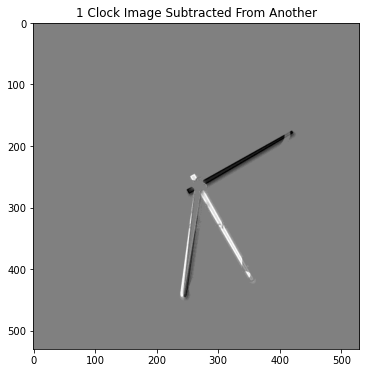

In [102]:
imgsub = image_subtraction(img1_grey, img2_grey)
plt.gray()
plt.figure(figsize=(6,6))
plt.title('1 Clock Image Subtracted From Another')
plt.imshow(imgsub)
plt.show()

In [103]:
mpimg.imsave("clocksub.png",imgsub)

***4.Filtering Kernels.***

*(a) Create a 2D list for each of the following filter kernels. (e.g.* a = [[1, 2, 3], [4, 5, 6]] *creates a 2D list with 2 rows and 3 columns.)*

i. Low pass filter 

    [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9],[1/9, 1/9, 1/9]] 

ii. High pass filter 

    [[0, -1, 0], [-1, 4, -1],[0, -1, 0]]

iii. Vertical Sobel Edge 

    [[-1,0,1], [-2,0,2],[-1, 0, 1]]

iv. Horizontal Sobel Edge 

    [[-1, -2, -1], [0,0,0],[1, 2, 1]]

v. Edge Enhance 
    
    [[-k/8, -k/8, -k/8], [-k/8,k+1,-k/8],[-k/8,-k/8, -k/8]] 

vi. Shift/Subtract 

    [[0, 0, 0], [0,1,0],[0,0, -1]]

In [315]:
k=1
low_pass = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9],[1/9, 1/9, 1/9]])
high_pass = np.array([[0, -1, 0], [-1, 4, -1],[0, -1, 0]] )
vert_sobel_edge = np.array([[-1,0,1], [-2,0,2],[-1, 0, 1]] )
horz_sobel_edge = np.array([[-1, -2, -1], [0,0,0],[1, 2, 1]] )
edge_enhance = np.array([[-k/8, -k/8, -k/8], [-k/8,k+1,-k/8],[-k/8,-k/8, -k/8]] )
shift_subtract = np.array([[0, 0, 0], [0,1,0],[0,0, -1]])

*(b) Convolve each of your kernels with the ascent image from above. Each convolution took roughly 2 minutes.*

       from scipy import signal
       output=signal.convolve2d(kernel,ascent)
       plt.imshow(output)
       plt.show()

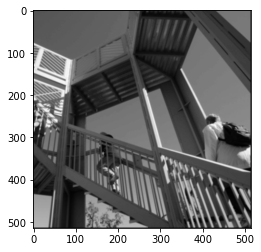

In [316]:
ascent_low=signal.convolve2d(low_pass,ascent)
plt.imshow(ascent_low)
plt.show()

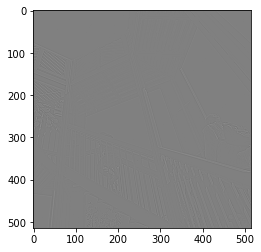

In [317]:
ascent_high=signal.convolve2d(high_pass,ascent)
plt.imshow(ascent_high)
plt.show()

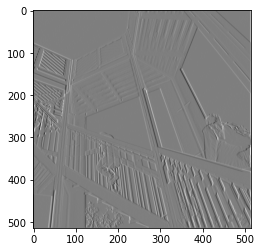

In [318]:
ascent_vsobel=signal.convolve2d(vert_sobel_edge,ascent)
plt.imshow(ascent_vsobel)
plt.show()

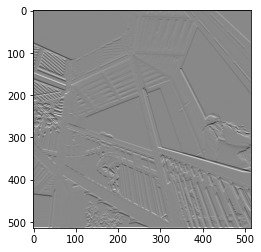

In [319]:
ascent_hsobel=signal.convolve2d(horz_sobel_edge,ascent)
plt.imshow(ascent_hsobel)
plt.show()

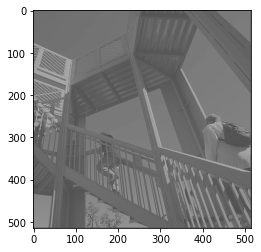

In [322]:
k=5
ascent_edge=signal.convolve2d(edge_enhance,ascent)
plt.imshow(ascent_edge)
plt.show()

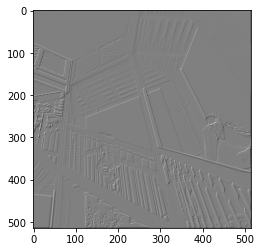

In [321]:
ascent_sub=signal.convolve2d(shift_subtract,ascent)
plt.imshow(ascent_sub)
plt.show()